##### Python Helpers



In [40]:
import numpy as np
from scipy.special import comb  # Binomial coefficient
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Bernstein polynomial function
def bernstein_poly(n, i, t):
    return sp.comb(n, i) * (t ** i) * ((1 - t) ** (n - i))

# Define function to update plot
def plot_bernstein(n):
    plt.figure(figsize=(15, 10))    
    for i in range(n + 1):
        plt.plot(t, bernstein_poly(n, i, t), label=f'$B_{{{n},{i}}}(t)$')
    plt.title(f"Bernstein Basis Polynomials (n={n})")
    plt.xlabel("t")
    plt.ylabel("$B_{n,i}(t)$")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

##### Plot the Bernstein Polynomials

In [41]:
# Parameter range
t = np.linspace(0, 1, 100)

# Create an interactive widget
interact(plot_bernstein, n=widgets.IntSlider(min=1, max=10, step=1, value=3));

interactive(children=(IntSlider(value=3, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

###### Python Helpers

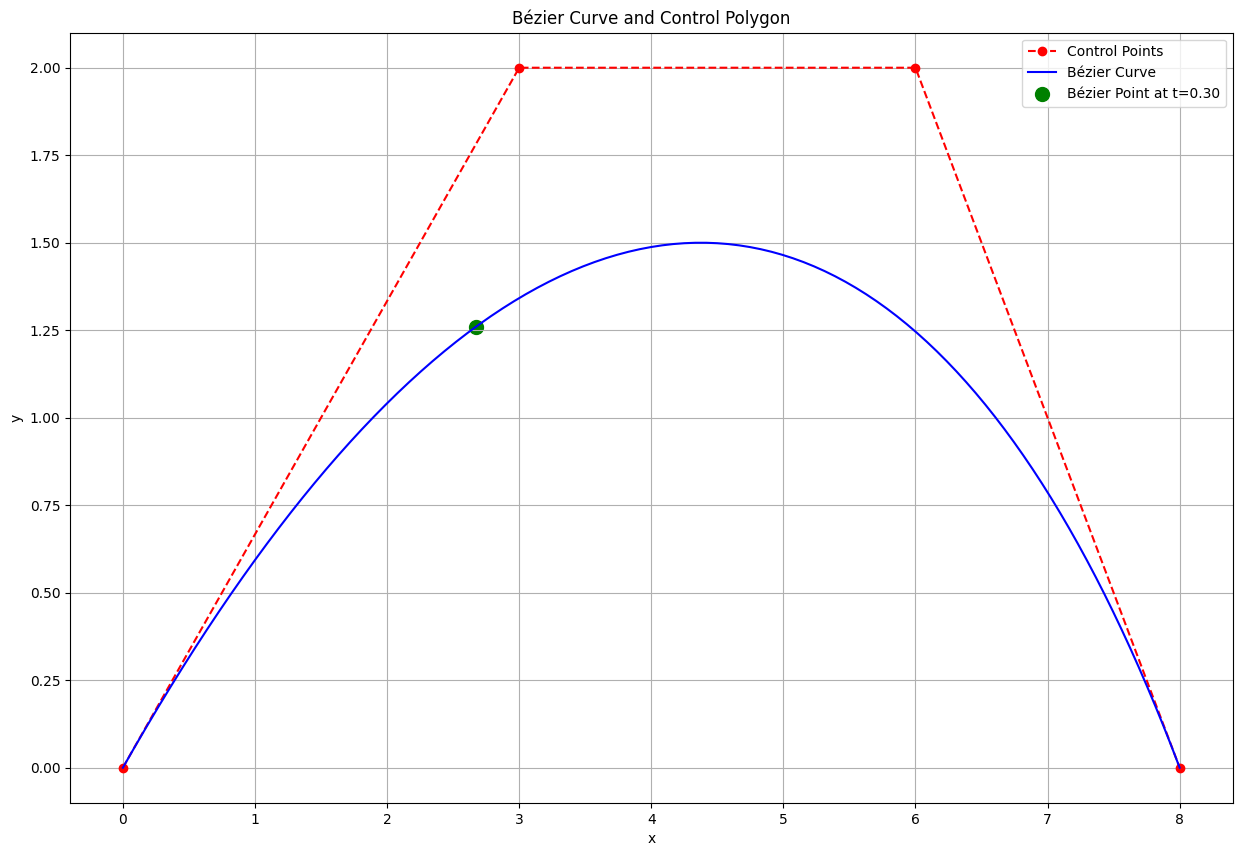

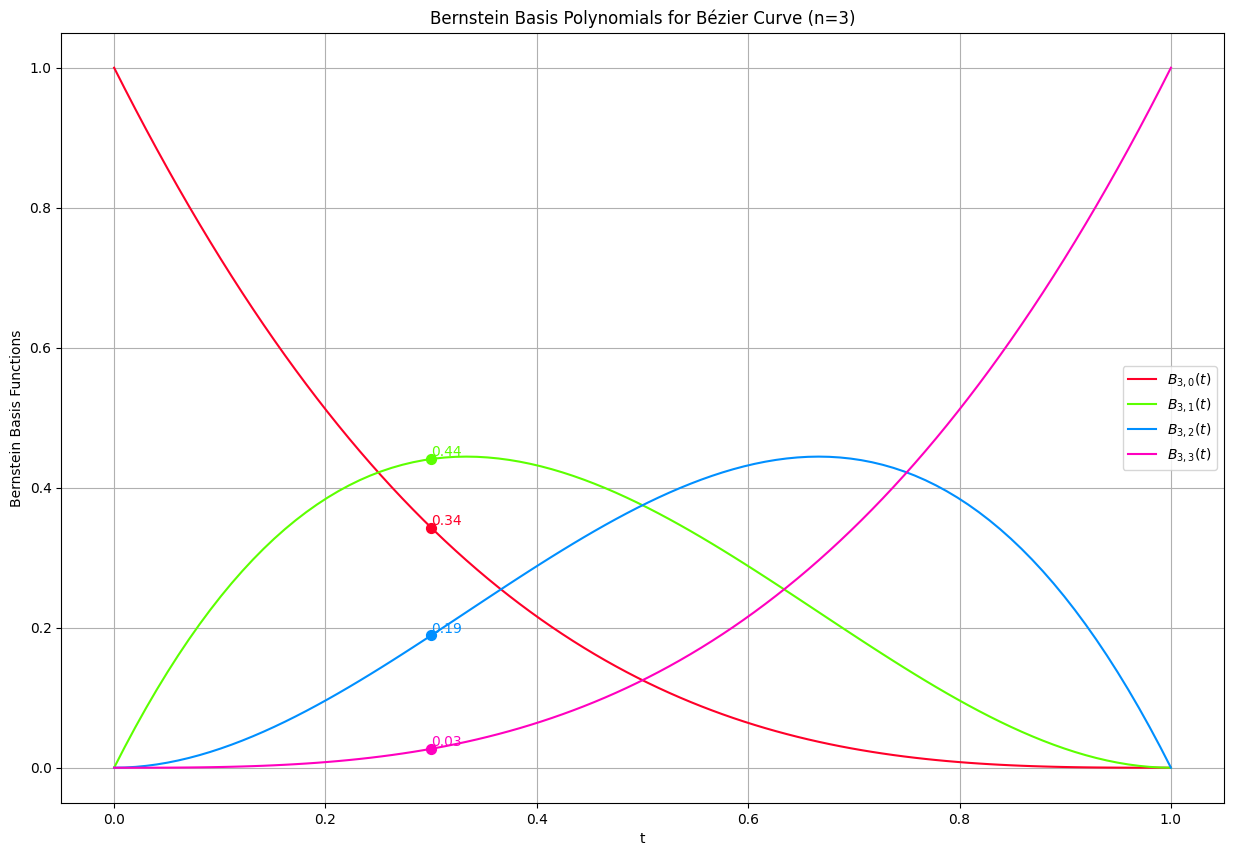

In [45]:
# Bézier curve evaluation using Bernstein polynomials
def bezier_curve(control_points, t):
    """
    Evaluates a Bézier curve at given parameter values t.

    Parameters:
    -----------
    control_points : np.ndarray
        An (n+1, d) array of control points, where n is the degree of the curve, and d is the dimensionality (2D or 3D).
    
    t : np.ndarray
        A 1D array of parameter values in [0,1] at which to evaluate the curve.

    Returns:
    --------
    np.ndarray
        An array of evaluated points on the Bézier curve.
    """
    n = len(control_points) - 1  # Degree of the Bézier curve
    bernstein_weights = np.array([bernstein_poly(n, i, t) for i in range(n + 1)]).T
    return np.dot(bernstein_weights, control_points)



# Control Points
cps = np.array([[0, 0], [3, 2], [6, 2], [8, 0]])

# Degree of the curve
curve_degree = len(cps) - 1  

# Parameter range
t = np.linspace(0, 1, 100)

curve = bezier_curve(cps, t)

# Select a specific value of t for visualization
t_selected = 0.3

bernstein_at_t = np.array(bernstein_poly(curve_degree, np.arange(curve_degree + 1), t_selected)).T
point_at_t = np.dot(bernstein_at_t, cps)

# Use a colormap for consistent coloring
colors = plt.cm.gist_rainbow(np.linspace(0, 1, curve_degree + 1))

### Plot 1: Bézier Curve and Control Polygon ###
plt.figure(figsize=(15, 10))
plt.plot(cps[:, 0], cps[:, 1], 'ro--', label="Control Points")  # Control polygon
plt.plot(curve[:, 0], curve[:, 1], 'b-', label="Bézier Curve")  # Bézier curve
plt.scatter(point_at_t[0], point_at_t[1], color='g', s=100, label=f"Bézier Point at t={t_selected:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Bézier Curve and Control Polygon")
plt.show()

### Plot 2: Bernstein Basis Functions ###
plt.figure(figsize=(15, 10))
for i in range(curve_degree + 1):
    plt.plot(t, bernstein_weights[i], label=f'$B_{{{curve_degree},{i}}}(t)$', color=colors[i])
    plt.scatter(t_selected, bernstein_at_t[i], color=colors[i], s=50)
    plt.text(t_selected, bernstein_at_t[i], f'{bernstein_at_t[i]:.2f}', verticalalignment='bottom', color=colors[i])
plt.xlabel("t")
plt.ylabel("Bernstein Basis Functions")
plt.legend()
plt.grid()
plt.title(f"Bernstein Basis Polynomials for Bézier Curve (n={curve_degree})")
plt.show()


### Matrix Form

NB: outer product, denoted with $\otimes$, is defined as follows. Given two vectors $u = (1 \times m)$ and $v = (1 \times n)$:

$$
\mathbf {u} =
\begin{bmatrix} 
u_{1} \\ 
u_{2} \\ 
\vdots \\ 
u_{m} 
\end{bmatrix}, 
\quad 
\mathbf {v} =
\begin{bmatrix} 
v_{1} \\ 
v_{2} \\ 
\vdots \\ 
v_{n} 
\end{bmatrix}
$$

The outer product, $\mathbf {u} \otimes \mathbf {v}$, is a $m \times n$ matrix:

$$
\mathbf {u} \otimes \mathbf {v} =\mathbf {A} =
\begin{bmatrix} 
u_{1}v_{1} & u_{1}v_{2} & \dots & u_{1}v_{n} \\ 
u_{2}v_{1} & u_{2}v_{2} & \dots & u_{2}v_{n} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
u_{m}v_{1} & u_{m}v_{2} & \dots & u_{m}v_{n} 
\end{bmatrix}
$$

#### Bézier Curve in Matrix Form
Using the outer product notation, we rewrite the Bézier curve equation as:

$$
\mathbf{P}(t) =
\left( \mathbf{B}(t) \otimes \mathbf{P} \right)
$$

where:
- $\mathbf{B}(t)$ is the Bernstein basis vector:

$$
\mathbf{B}(t) =
\begin{bmatrix}
B_{n,0}(t) \\ 
B_{n,1}(t) \\ 
\vdots \\ 
B_{n,n-1}(t)
\end{bmatrix}
$$

- $\mathbf{P}$ is the vector of control points:

$$
\mathbf{P} =
\begin{bmatrix}
\mathbf{P}_0 \\ 
\mathbf{P}_1 \\ 
\vdots \\ 
\mathbf{P}_{n-1}
\end{bmatrix}
$$

Since the outer product results in a summation of element-wise products, the final Bézier curve equation remains:

$$
\mathbf{P}(t) =
\mathbf{B}(t)^\top \mathbf{P}
$$

Alternatively, using the binomial coefficient matrix:

$$
\mathbf{P}(t) =
\begin{bmatrix}
1 & - (n-1) & \binom{n-1}{2} & \dots & (-1)^{n-1} \\
0 & 1 & - (n-2) & \dots & (-1)^{n-2} \binom{n-1}{n-1} \\
0 & 0 & 1 & \dots & (-1)^{n-3} \binom{n-1}{n-2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
t \\
t^2 \\
\vdots \\
t^{n-1}
\end{bmatrix}
\begin{bmatrix}
\mathbf{P}_0 \\
\mathbf{P}_1 \\
\vdots \\
\mathbf{P}_{n-1}
\end{bmatrix}
$$

This representation generalizes Bézier curves for any number of control points, allowing for computational efficiency using matrix multiplication.


#### Quadratic Bézier Curve

For a quadratic Bézier curve defined by three control points $\mathbf{P}_0, \mathbf{P}_1, \mathbf{P}_2$, the parametric equation is:

$$
\mathbf{P}(t) = (1-t)^2 \mathbf{P}_0 + 2(1-t)t \mathbf{P}_1 + t^2 \mathbf{P}_2
$$

which can be rewritten in matrix form as:

$$
\mathbf{P}(t) =
\begin{bmatrix}
(1-t)^2 & 2(1-t)t & t^2
\end{bmatrix}
\begin{bmatrix}
\mathbf{P}_0 \\
\mathbf{P}_1 \\
\mathbf{P}_2
\end{bmatrix}
$$

Alternatively, using a matrix representation:

$$
\mathbf{P}(t) =
\begin{bmatrix}
1 & -2 & 1 \\
0 & 2 & -2 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
t \\
t^2
\end{bmatrix}
\begin{bmatrix}
\mathbf{P}_0 \\
\mathbf{P}_1 \\
\mathbf{P}_2
\end{bmatrix}
$$

#### Cubic Bézier Curve

For a cubic Bézier curve defined by four control points $\mathbf{P}_0, \mathbf{P}_1, \mathbf{P}_2, \mathbf{P}_3$, the parametric equation is:

$$
\mathbf{P}(t) = (1-t)^3 \mathbf{P}_0 + 3(1-t)^2 t \mathbf{P}_1 + 3(1-t)t^2 \mathbf{P}_2 + t^3 \mathbf{P}_3
$$

which can be rewritten in matrix form as:

$$
\mathbf{P}(t) =
\begin{bmatrix}
(1-t)^3 & 3(1-t)^2t & 3(1-t)t^2 & t^3
\end{bmatrix}
\begin{bmatrix}
\mathbf{P}_0 \\
\mathbf{P}_1 \\
\mathbf{P}_2 \\
\mathbf{P}_3
\end{bmatrix}
$$

Alternatively, using a matrix representation:

$$
\mathbf{P}(t) =
\begin{bmatrix}
1 & -3 & 3 & -1 \\
0 & 3 & -6 & 3 \\
0 & 0 & 3 & -3 \\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
t \\
t^2 \\
t^3
\end{bmatrix}
\begin{bmatrix}
\mathbf{P}_0 \\
\mathbf{P}_1 \\
\mathbf{P}_2 \\
\mathbf{P}_3
\end{bmatrix}
$$

This matrix representation allows efficient computation of Bézier curves using linear algebra.


## Derivatives

$$
  P_{n,0}(t) = \sum\limits_{i=0}^n P_{i}B_{n,i}(t)
$$

Since the control points are constants and independent of the variable t, computing the derivative curve $\frac{\partial P_{n,0}(t)}{\partial t}$ reduces to the computation of the derivatives of $\frac{\partial B_{n,i}(t)}{\partial t}$.

$$
  \frac{\partial P_{n,0}(t)}{\partial t} = \frac{\partial}{\partial t}\sum\limits_{i=0}^n P_{i}B_{n,i}(t) = \sum\limits_{i=0}^n P_{i}\frac{\partial B_{n,i}(t)}{\partial t} = \sum\limits_{i=0}^{n-1} n \left( P_{i+1} - P_{i} \right) B_{n-1,i}(t) 
$$

<details>
<summary><strong>Proof of the Derivative Formula for Bernstein Polynomials</strong></summary>

We want to prove that:

$$
\frac{d}{dt} B_{n,i}(t) = n \left[ B_{n-1,i-1}(t) - B_{n-1,i}(t) \right]
$$

where $B_{n,i}(t)$ is the Bernstein basis polynomial. 
By definition and using the product rule: 

$$
\frac{d}{dt} B_{n,i}(t) = \frac{d}{dt} \left[ \binom{n}{i} t^i (1 - t)^{n-i} \right] = \binom{n}{i} \left[ i t^{i-1} (1 - t)^{n-i} - (n - i) t^i (1 - t)^{n-i-1} \right]
$$


We now express each term in terms of Bernstein polynomials of degree \( n-1 \).

Looking at the term:

$$
t^{i-1} (1 - t)^{n-i}
$$

we multiply and divide by \( n \):

$$
\frac{i}{n} \cdot n \cdot t^{i-1} (1 - t)^{n-i}
$$

Recognizing that:

$$
B_{n-1,i-1}(t) = \binom{n-1}{i-1} t^{i-1} (1 - t)^{(n-1)-(i-1)}
$$

we rewrite:

$$
t^{i-1} (1 - t)^{n-i} = \frac{\binom{n-1}{i-1}}{\binom{n}{i}} B_{n-1,i-1}(t)
$$

Thus,

$$
i t^{i-1} (1 - t)^{n-i} = \frac{i}{n} \cdot \frac{\binom{n}{i}}{\binom{n-1}{i-1}} n B_{n-1,i-1}(t)
$$

Since:

$$
\frac{\binom{n}{i}}{\binom{n-1}{i-1}} = \frac{n! / (i! (n-i)!)}{(n-1)! / ((i-1)! (n-i)!)} = \frac{n}{i}
$$

we get:

$$
i t^{i-1} (1 - t)^{n-i} = n B_{n-1,i-1}(t)
$$

Looking at the term:

$$
t^i (1 - t)^{n-i-1}
$$

similarly, we recognize:

$$
B_{n-1,i}(t) = \binom{n-1}{i} t^i (1 - t)^{(n-1)-i}
$$

Thus,

$$
(n - i) t^i (1 - t)^{n-i-1} = n B_{n-1,i}(t)
$$

Substituting both expressions back into our derivative equation:

$$
\frac{d}{dt} B_{n,i}(t) = \binom{n}{i} \left[ n B_{n-1,i-1}(t) - n B_{n-1,i}(t) \right]
$$

Since $\binom{n}{i} \cdot \frac{1}{n} = 1$, we simplify to:

$$
\frac{d}{dt} B_{n,i}(t) = n \left[ B_{n-1,i-1}(t) - B_{n-1,i}(t) \right]
$$

which completes the proof.
</details>


<details>
  <summary><strong>Proof of the Bézier Curve Derivative Formula</strong></summary>

  
  From earlier proof, the derivative of the Bernstein polynomial is:

  $$
  \frac{d}{dt} B_{n,i}(t) = n \left[ B_{n-1,i-1}(t) - B_{n-1,i}(t) \right]
  $$

  Substituting this into Bézier derivative equation:

  $$
  \frac{d}{dt} P_n(t) = \sum\limits_{i=0}^{n} P_i n \left[ B_{n-1,i-1}(t) - B_{n-1,i}(t) \right]
  $$

  Rearranging the summation:

  $$
  \frac{d}{dt} P_n(t) = n \sum\limits_{i=0}^{n} P_i B_{n-1,i-1}(t) - n \sum\limits_{i=0}^{n} P_i B_{n-1,i}(t)
  $$

  We need to define the new control points, redefining the terms as follow:

  - **First summation:** Shift index: Let $j = i - 1$, so $P_i$ becomes $P_{j+1}$.
    
    $$
    \sum\limits_{i=0}^{n} P_i B_{n-1,i-1}(t) = \sum\limits_{j=-1}^{n-1} P_{j+1} B_{n-1,j}(t)
    $$

    Since $B_{n-1,-1}(t) = 0$, the sum starts at $j = 0$:

    $$
    \sum\limits_{j=0}^{n-1} P_{j+1} B_{n-1,j}(t)
    $$

  - **Second summation:** No shift needed:

    $$
    \sum\limits_{i=0}^{n} P_i B_{n-1,i}(t) = \sum\limits_{i=0}^{n-1} P_i B_{n-1,i}(t)
    $$

  Thus, rewriting:

  $$
  \frac{d}{dt} P_n(t) = n \sum\limits_{j=0}^{n-1} (P_{j+1} - P_j) B_{n-1,j}(t)
  $$

  Since $B_{n-1,j}(t)$ forms the basis for a Bézier curve of degree $n-1$, we define new control points:

  $$
  P_j' = n (P_{j+1} - P_j)
  $$

  Thus, the derivative of the Bézier curve is:

  $$
  \frac{d}{dt} P_n(t) = \sum\limits_{j=0}^{n-1} P_j' B_{n-1,j}(t)
  $$

  which represents a **new Bézier curve of degree \( n-1 \)** with new control points:

  $$
  P_j' = n (P_{j+1} - P_j), \quad j = 0, \dots, n-1
  $$

  This completes the proof

</details>

Thus, the derivative of the Bézier curve is:

$$
\frac{d}{dt} P_n(t) = \sum\limits_{i=0}^{n-1} P_i' B_{n-1,i}(t)
$$

which represents a **new Bézier curve of degree \( n-1 \)** with new control points:

$$
P_i' = n (P_{i+1} - P_i), \quad i = 0, \dots, n-1
$$

So the derivative of an $n$-degree Bézier curve is another Bézier curve of degree $n-1$. The control points of the derivative curve are computed as differences of consecutive control points, scaled by $n$. 
This derivative curve is usually referred to as the hodograph of the original Bézier curve. Note that $P_{i+1} - P_i$ is the direction vector from $P_i$ to $P_{i+1}$ and n $(P_{i+1} - P_i)$ is $n$ times longer than the direction vector. Once the control points are known, the control points of its derivative curve can be obtained immediately. This formula is useful for **tangent vector computation** and **spline smoothing**.

##### k-th Derivative of a Bézier Curve

By recursively applying the differentiation formula, the $k$-th derivative of $P(t)$ is:

$$
P^{(k)}(t) = \sum_{i=0}^{n-k} P_i^{(k)} \binom{n-k}{i} (1 - t)^{n-k-i} t^i = \sum_{i=0}^{n-k} P_i^{(k)} B_{n-k,i}
$$

where the new control points are computed recursively as:

$$
P_i^{(k)} = (n - k + 1) (P_{i+1}^{(k-1)} - P_i^{(k-1)}),
$$

starting with:

$$
P_i^{(0)} = P_i.
$$

The control points for the $k$-th derivative are given explicitly as:

$$
P_i^{(k)} = \frac{n!}{(n-k)!} \sum_{j=0}^{k} (-1)^{k-j} \binom{k}{j} P_{i+j}, \quad i = 0, \dots, n-k.
$$

This means that for any order $k$, the Bézier curve derivative remains a Bézier curve but of reduced degree $n - k$, with new computed control points.



In [46]:
# Compute the k-th derivative of the Bernstein polynomial
def bernstein_derivative(i, n, k, t):
    if k == 0:
        return bernstein_poly(n, i, t)
    
    if k > n:
        return np.zeros_like(t)  # Higher derivatives vanish
    
    coeff = np.prod([n - j for j in range(k)])  # Falling factorial (n)(n-1)...(n-k+1)
    return coeff * (bernstein_poly(n - k, i - k, t) - bernstein_poly(n - k, i, t))

# Plot Bernstein polynomials and derivatives
def plot_bernstein_and_derivatives(degree, derivative_order):
    """
    Plots Bernstein polynomials and their derivatives up to a specified order.

    Parameters:
    -----------
    degree : int
        The degree of the Bernstein polynomials (n).
        
    derivative_order : int
        The highest order of derivatives to compute and plot (k).
    Example:
    --------
    ```python
    plot_bernstein_and_derivatives(degree=5, derivative_order=2)
    ```
    This will plot the Bernstein polynomials of degree 5 and their first and second derivatives.

    Returns:
    --------
    None
        Displays a plot with subplots for the Bernstein polynomials and their derivatives.
    """
    t = np.linspace(1e-8, 1 - 1e-8, 500)  # Avoid singularities at 0 and 1
    fig, axes = plt.subplots(derivative_order + 1, 1, figsize=(10, 4 * (derivative_order + 1)))

    for k in range(derivative_order + 1):
        ax = axes[k]
        for i in range(degree + 1):
            ax.plot(t, bernstein_derivative(i, degree, k, t), label=f'B_{degree},{i}^{("("+str(k)+")") if k else ""}')
        ax.set_title(f'Bernstein Polynomials - {k}-th derivative')
        ax.set_xlabel('t')
        ax.set_ylabel('Value')
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.grid(True)

    plt.tight_layout()
    plt.show()


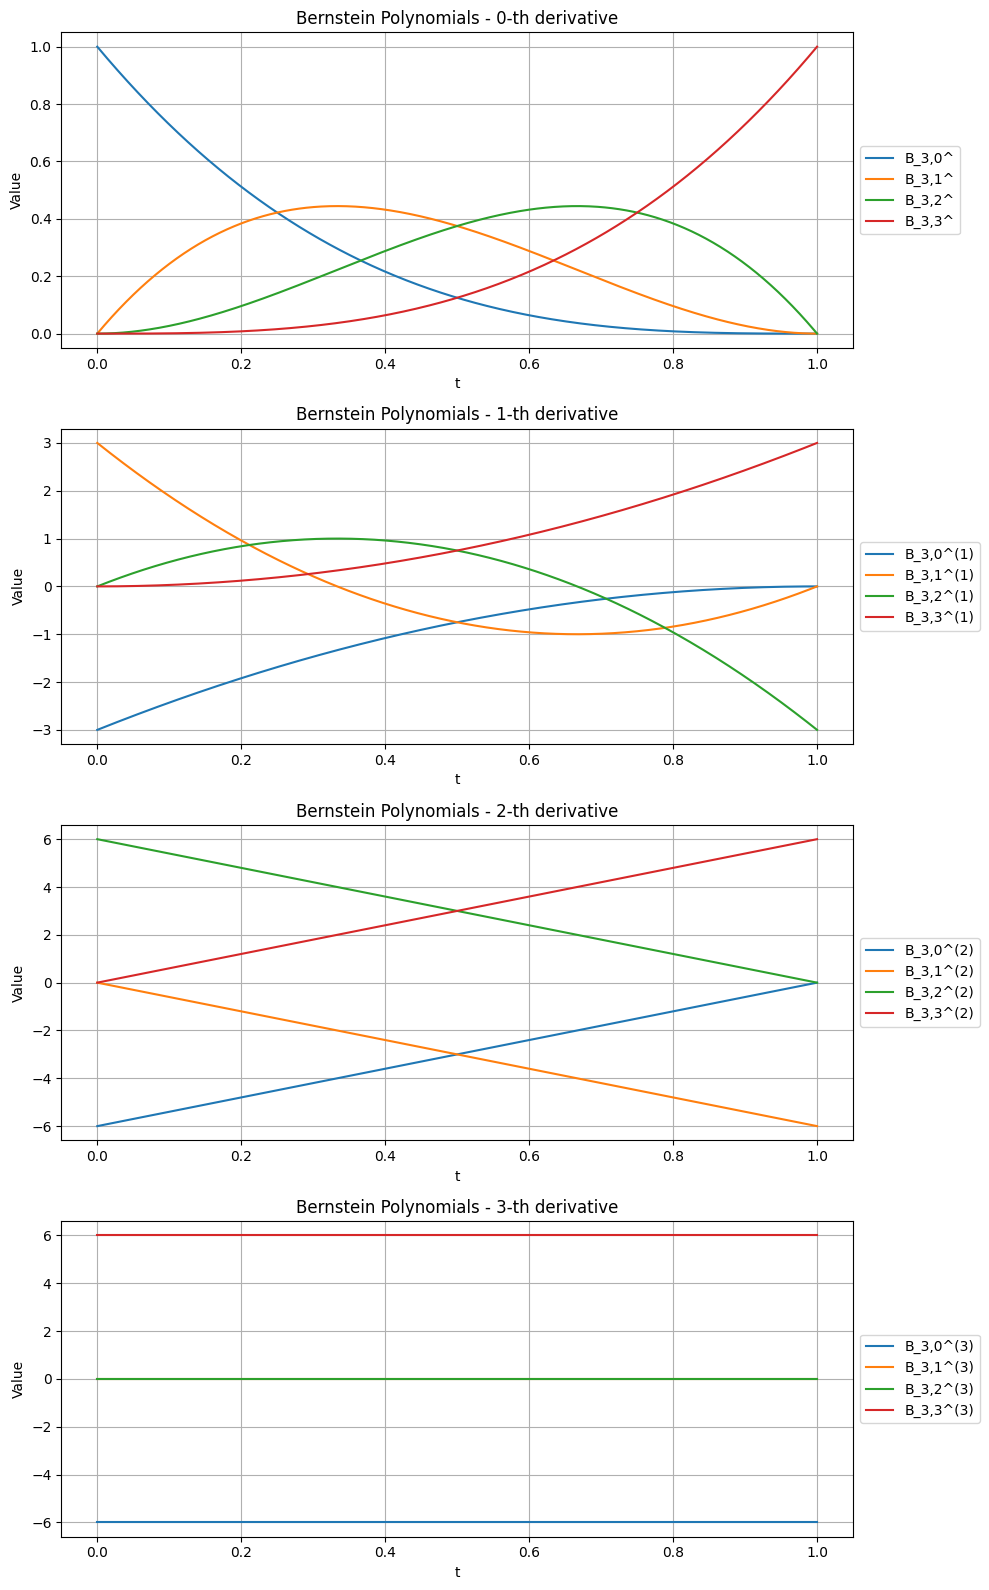

In [47]:
# Example usage
plot_bernstein_and_derivatives(degree=3, derivative_order=3)

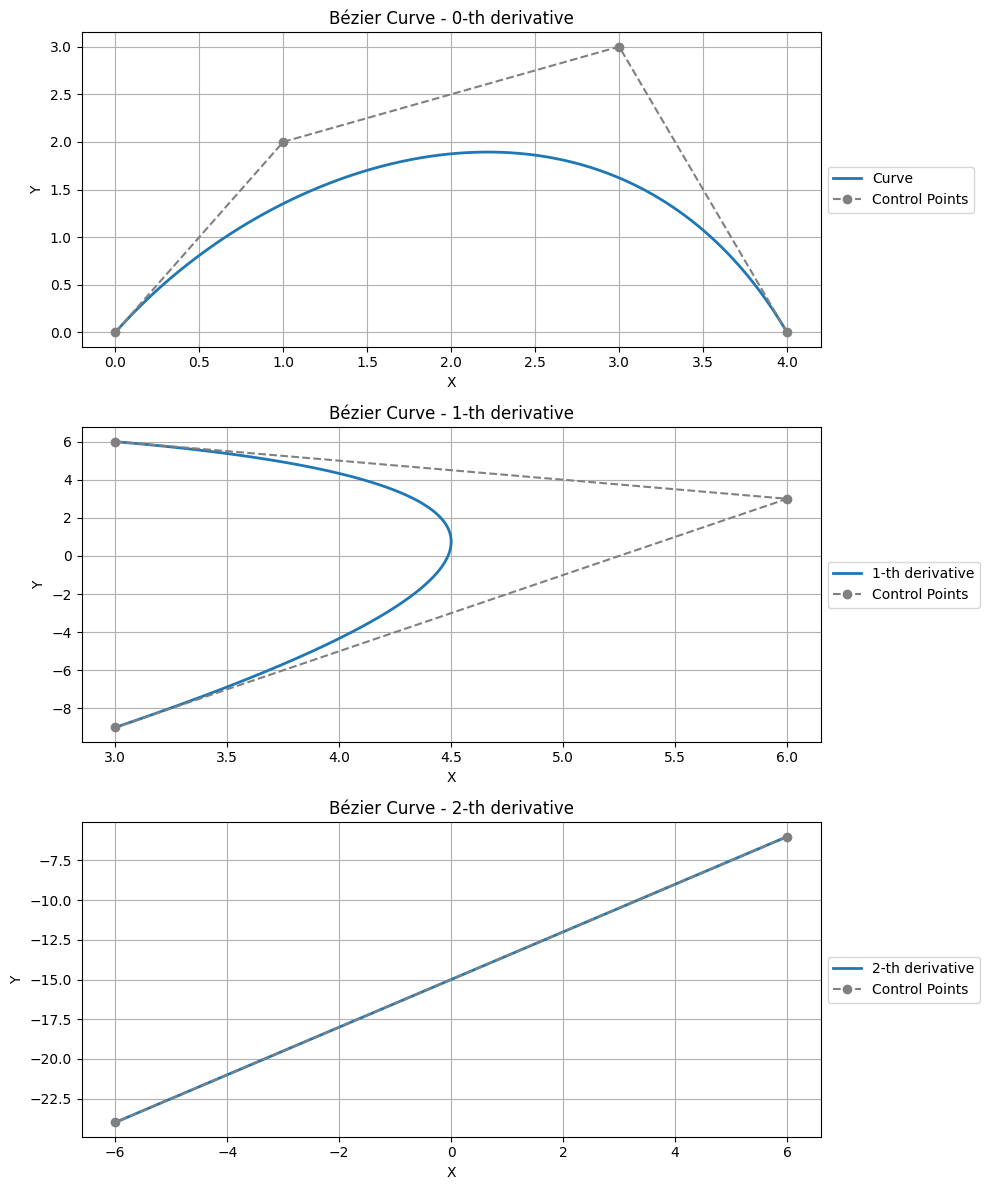

In [55]:
# Compute the control points for the k-th derivative of a Bézier curve
def bezier_derivative_control_points(control_points):
    n = len(control_points) - 1
    if n == 0:
        return np.zeros_like(control_points)
    return np.array([n * (control_points[j + 1] - control_points[j]) for j in range(n)])

# Evaluate the k-th derivative of a Bézier curve
def bezier_derivative(control_points, k, t):
    derivative_points = control_points.copy()
    for _ in range(k):
        if len(derivative_points) <= 1:
            return np.zeros((len(t), control_points.shape[1])), derivative_points  # Return zero curve if derivatives vanish
        derivative_points = bezier_derivative_control_points(derivative_points)
    return bezier_curve(derivative_points, t), derivative_points

def plot_bezier_and_derivatives(control_points, derivative_order):
    """
    Plots a Bézier curve and its derivatives up to a specified order.

    Parameters:
    -----------
    control_points : np.ndarray
        An (n+1, d) array of control points defining the Bézier curve.
    
    derivative_order : int
        The highest order of derivative to compute and plot.

    Returns:
    --------
    None
        Displays a plot of the Bézier curve and its derivatives, along with their control points.
    """
    t = np.linspace(1e-8, 1 - 1e-8, 500)  # Avoid singularities at 0 and 1
    fig, axes = plt.subplots(derivative_order + 1, 1, figsize=(10, 4 * (derivative_order + 1)))

    current_control_points = control_points.copy()  # Avoid modifying the original control points

    for k in range(derivative_order + 1):
        ax = axes[k]
        
        # Compute Bézier curve and new control points at this derivative level
        curve, new_control_points = bezier_derivative(control_points, k, t)
        
        # Plot the Bézier curve at this derivative level
        ax.plot(curve[:, 0], curve[:, 1], label=f'{k}-th derivative' if k else 'Curve', linewidth=2)

        # Plot the control points and control polygon for this derivative level
        if len(new_control_points) > 1:
            ax.plot(new_control_points[:, 0], new_control_points[:, 1], 'o--', color='gray', label='Control Points')
        
        ax.set_title(f'Bézier Curve - {k}-th derivative')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.grid(True)

        # Update control points for the next derivative iteration
        current_control_points = new_control_points.copy()

    plt.tight_layout()
    plt.show()


# Example usage
control_pts = np.array([[0, 0], [1, 2], [3, 3], [4, 0]])
plot_bezier_and_derivatives(control_pts, derivative_order=2)